In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime

In [2]:
%run -i "D:/crs/src/NOPP_Utilities/storm_coords.py"
%run -i "D:/crs/src/NOPP_Utilities/scat_stats.py"

In [73]:
# Pamlico Sound model results
url='http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/dorian_coupled11/PAM/dorian_his.ncml'
dsm = xr.open_dataset(url)
latm = dsm.lat_rho.values
lonm = dsm.lon_rho.values
timem = dsm.ocean_time.values

<xarray.Dataset> Size: 52GB
Dimensions:          (tracer: 2, s_rho: 16, s_w: 17, eta_rho: 857,
                      xi_rho: 1067, eta_u: 857, xi_u: 1066, eta_v: 856,
                      xi_v: 1067, eta_psi: 856, xi_psi: 1066, ocean_time: 193)
Coordinates:
  * s_rho            (s_rho) float64 128B -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 136B -1.0 -0.9375 -0.875 ... -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 7MB -76.89 -76.89 ... -75.84
    lat_rho          (eta_rho, xi_rho) float64 7MB 34.31 34.31 ... 36.84 36.84
    lon_u            (eta_u, xi_u) float64 7MB ...
    lat_u            (eta_u, xi_u) float64 7MB ...
    lon_v            (eta_v, xi_v) float64 7MB ...
    lat_v            (eta_v, xi_v) float64 7MB ...
    lon_psi          (eta_psi, xi_psi) float64 7MB ...
    lat_psi          (eta_psi, xi_psi) float64 7MB ...
  * ocean_time       (ocean_time) datetime64[ns] 2kB 2019-08-30 ... 2019-09-07
Dimensions without coordinates: tracer, eta_rho, xi_rho, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/91)
    ntimes           int32 4B ...
    ndtfast          int32 4B ...
    dt               float64 8B ...
    dtfast           float64 8B ...
    dstart           datetime64[ns] 8B ...
    nHIS             int32 4B ...
    ...               ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 11GB ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 11GB ...
    Pair             (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Hwave            (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Dwave            (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Pwave_top        (ocean_time, eta_rho, xi_rho) float32 706MB ...
Attributes: (12/32)
    file:                      ./Output/Dorian_Pam_his_00007.nc
    format:                    netCDF-3 64bit offset file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Hurricane Dorian
    var_info:                  ROMS/External/varinfo.dat
    ...                        ...
    tiling:                    012x007
    history:                   ROMS/TOMS, Version 3.9, Sunday - January 8, 20...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               DORIAN, ANA_BSFLUX, ANA_BTFLUX, ANA_FSOBC, ANA...
    EXTRA_DIMENSION.N:         16
    EXTRA_DIMENSION.boundary:  4

In [3]:
# Target date
start_date = np.datetime64('2019-09-03 00:00:00')
end_date = np.datetime64('2019-09-07 00:00:00')
tol = np.timedelta64(14, 'm') # not used

In [100]:
# Data directory for observations downloaded using the Flood Event Viewer https://stn.wim.usgs.gov/fev/#2019Dorian
data_dir = 'D:/crs/docs/papers/2023_Warner_Dorian_paper/WL_Waves_data/'
# List of stations

sta_list = ['NCBEA11728',
            'NCCAR12328',
            'NCCRV00003',
            'NCHYD00001',
            'NCPAM13231']
url_list = ['NCBEA11728_stormtide_unfiltered.nc',
            'NCCAR12328_stormtide_unfiltered.nc',     
            'NCCRV00003_stormtide_unfiltered.nc',  
            'NCHYD00001_stormtide_unfiltered.nc',
            'NCPAM13231_stormtide_unfiltered.nc']

print(sta_list)
print(url_list)

['NCBEA11728', 'NCCAR12328', 'NCCRV00003', 'NCHYD00001', 'NCPAM13231']
['NCBEA11728_stormtide_unfiltered.nc', 'NCCAR12328_stormtide_unfiltered.nc', 'NCCRV00003_stormtide_unfiltered.nc', 'NCHYD00001_stormtide_unfiltered.nc', 'NCPAM13231_stormtide_unfiltered.nc']


In [ ]:
# Correction from model datum (MSL = 0.32) to WL datum (NAVD88 = 0.39) at Hattaras
# NAVD88 = MSL + zcorr (m)
zcorr = -0.07 

In [12]:
# # Find common times between model and bouys
# common_times, tidxm, tidxb = np.intersect1d( ot, wtime1, return_indices=True)
# print(np.shape(tidxm))
# print(np.shape(tidxb))

# # Step 2: Extract data from dataset1 and dataset2 based on the common times
# Hsm1 =  dsm.Hwave[tidxm, ilat1, ilon1]
# print(np.shape(Hsm1))
# print(np.shape(Hso1[tidxb]))

In [123]:
for i, url in enumerate( url_list ):
    ds = xr.open_dataset( data_dir + url )
    lato = ds['latitude'].values
    lono = ds['longitude'].values
    sensor_elev = ds.attrs['sensor_orifice_elevation_at_deployment_time']
    print('\n',sta_list[i], 'sensor_elev:', sensor_elev)
    print('{:.3f}, {:.3f}'.format(lato, lono))
    time_all = ds['time'].values
    time_diffs = ds['time'].diff(dim='time')
    time_diffs_seconds = time_diffs.dt.total_seconds()
    # Print the first five elements as float values
    # print('Time differences in seconds:', time_diffs_seconds[:5].values)
    sample_interval = np.round( np.median( time_diffs_seconds ), 3 )
    # smooth over 10 minutes
    npts = 1.+600./sample_interval
    time_threshold = .9*sample_interval
    print('sample_interval: ', sample_interval, 'smoothing over: ',npts)


 NCBEA11728 sensor_elev: 0.2896
35.377, -76.748
sample_interval:  30.0 smoothing over:  21.0

 NCCAR12328 sensor_elev: 0.7376
34.697, -76.727
sample_interval:  0.25 smoothing over:  2401.0

 NCCRV00003 sensor_elev: 0.0762
34.936, -76.811
sample_interval:  30.0 smoothing over:  21.0

 NCHYD00001 sensor_elev: -0.0732
35.394, -76.328
sample_interval:  30.0 smoothing over:  21.0

 NCPAM13231 sensor_elev: -0.3048
35.025, -76.699
sample_interval:  30.0 smoothing over:  21.0


In [99]:
i=0
ds = xr.open_dataset( data_dir + sta_list[i]['url'] )
lato = ds['latitude'].values
lono = ds['longitude'].values
time_all = ds['time'].values
# Calculate the time difference between consecutive entries
time_diffs = ds['time'].astype('datetime64[ns]').diff(dim='time').astype('timedelta64[ms]').values
print('time_diffs: ',time_diffs[:5])
# # Display the unique time steps and their counts
# print(time_diffs.value_counts())
# # Optionally, get the most common time step
# most_common_time_step = time_diffs.mode()[0]
# print("Most common time step:", most_common_time_step)

idxws = int( np.where(time_all >= start_date)[0][0] )
idxwe = int( np.where(time_all <= end_date)[0][-1] )
timeo = time_all[idxws:idxwe]
# timeo = ds['time'][idxws:idxwe].values
wlufo = np.squeeze( ds.unfiltered_water_surface_height_above_reference_datum[idxws:idxwe].values )
wlo = np.squeeze( ds.water_surface_height_above_reference_datum[idxws:idxwe].values )
sensor_elev = ds.attrs['sensor_orifice_elevation_at_deployment_time']
sla = sensor_elev+.07

ds

time_diffs:  [249000000 250000000 250000000 249000000 249000000]


C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_44740\308705887.py:7: UserWarning: Converting non-nanosecond precision timedelta values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time_diffs = ds['time'].astype('datetime64[ns]').diff(dim='time').astype('timedelta64[ms]').values


<xarray.Dataset> Size: 86MB
Dimensions:                                                (time: 2156280,
                                                            station_id: 11)
Coordinates:
  * time                                                   (time) datetime64[ns] 17MB ...
    altitude                                               float64 8B ...
    latitude                                               float64 8B 34.7
    longitude                                              float64 8B -76.73
  * station_id                                             (station_id) object 88B ...
Data variables:
    air_pressure                                           (time) float64 17MB ...
    water_surface_height_above_reference_datum             (time) float64 17MB ...
    unfiltered_water_surface_height_above_reference_datum  (time) float64 17MB ...
    wave_wl                                                (time) float64 17MB ...
Attributes: (12/55)
    cdm_data_type:                                station
    comment:                                      not used at this time
    Conventions:                                  CF-1.6
    date_created:                                 2019-09-18T14:16:45Z
    date_modified:                                2019-09-18T14:16:45Z
    geospatial_lat_units:                         degrees_north
    ...                                           ...
    sea_pressure_instrument_make:                 TruBlue
    sea_pressure_instrument_model:                255
    sea_pressure_instrument_serial_number:        1511448
    title:                                        Calculation of water level ...
    summary:                                      This file contains three ti...
    uuid:                                         f8348ae0-b085-4ab3-aa5e-982...

In [ ]:
ws = 4*60*10+1 # sampling at 4 Hz, this is a 10-min runnng average
wghts = np.ones(ws) / ws  # Equal weights for averaging
# Apply the running average
wlufos = np.convolve(wlufo, wghts, mode='same')

wlufo[wlufo<=sla]=sla
wlufos[wlufos<=sla]=np.nan

plt.plot(timeo, wlufo)
plt.plot(timeo, wlo )
plt.plot(timeo, wlufos, '-r')
#plt.plot(timeo, sla, '--', color='gray')

In [78]:
# Calculate the difference between the model grid points and the buoy locations; find model indices to closest points
model_shape = np.shape( lonm )
print('model shape: ',model_shape)
mask_rho = dsm.mask_rho.values
print('nlat, nlon: ',np.shape(mask_rho))

# Find the indices of the nearest lat/lon
dist = haversine( (lonm*mask_rho), (latm*mask_rho) , lono, lato )
ilatm, ilonm = np.argwhere( dist == np.min(dist) ).squeeze()

print('ilatm, ilonm:', ilatm, ilonm )

model shape:  (857, 1067)
nlat, nlon:  (857, 1067)
ilatm, ilonm: 131 164


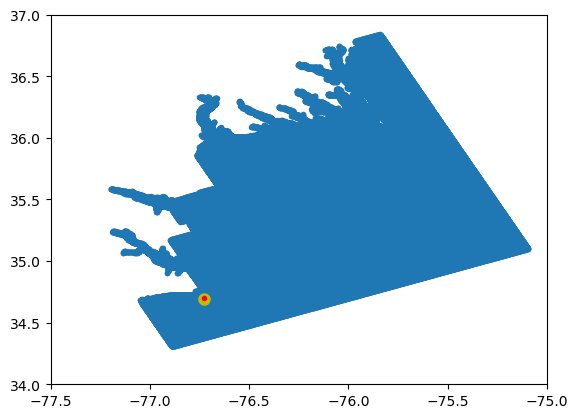

In [79]:
# Plot the grids, buoy locations, and corresponding grid point
_ = plt.plot((lonm*mask_rho).flatten(), (latm*mask_rho).flatten(), '.')
plt.xlim(-77.5, -75)
plt.ylim(34, 37)
plt.plot(lonm[ilatm, ilonm], latm[ilatm, ilonm], 'oy', ms = 8 )
plt.plot(lono, lato, '.r', ms=6 )

In [80]:
# Get the water depth
hm  = dsm.h[ilatm, ilonm].values
print('elev',sensor_elev,', model depth: ',hm,' distance apart:',dist[ilatm,ilonm])

elev 0.7376 , model depth:  1.033112307608253  distance apart: 0.1076233670921807


In [87]:
# Time threshold of 9 minutes
# time_threshold = np.timedelta64(9, 'm')

# Time threshold of .2 seconds 
time_threshold = np.timedelta64(200, 'ms')

# Empty arrays to hold indices into each time series
oindex_list = []
mindex_list = []

# Loop through each time in dataset_time1
for i, mt in enumerate(timem):
    # Calculate absolute time differences between the current model time and all times in obs. time
    time_diffs = np.abs(timeo - mt)
    
    # Find the nearest index within the threshold
    idx = np.argmin(time_diffs)
    
    # Check if the nearest time difference is within the threshold
    if time_diffs[idx] <= time_threshold:
        # Append to the index lists
        oindex_list.append(idx)
        mindex_list.append(i)

timeoi = timeo[oindex_list]
wlm = dsm.zeta.values[mindex_list, ilatm, ilonm]

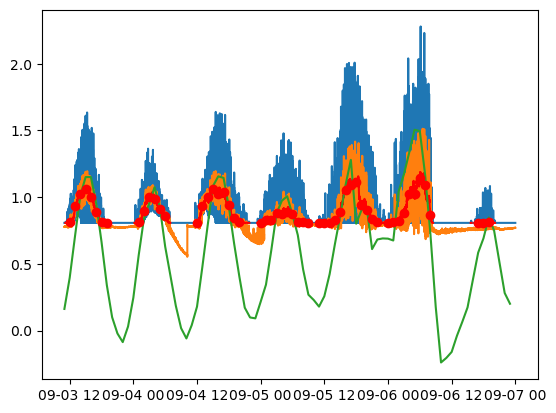

In [88]:
ws = 4*60*10+1 # sampling at 4 Hz, this is a 10-min runnng average
wghts = np.ones(ws) / ws  # Equal weights for averaging
# Apply the running average
wlufos = np.convolve(wlufo, wghts, mode='same')

wlufo[wlufo<=sla]=sla
wlufos[wlufos<=sla]=np.nan
wlufosi = wlufos[oindex_list]

plt.plot(timeo, wlufo)
plt.plot(timeo, wlo )
plt.plot(timeo, wlufos, '-r')
#plt.plot(timeo, sla, '--', color='gray')
timemi = timem[mindex_list]
plt.plot(timemi, wlm+.39)
plt.plot(timeoi, wlufosi, 'or')

In [92]:
# Calclulate scatter stats
a, s = scat_stats_string( wlm+.39, wlufosi, sep_lines=True )
txt = 'Bias: {0:.3f}\nRMSE: {1:.3f}\nNRMSE: {2:.3f}\nrho : {3:.3f}' \
    .format( a[4],a[2],a[5],a[3])
print(s)
print(txt)

N: 85
Nnan: 28
RMSE: 0.278
rho: 1.000
Bias: -0.113
NRMSE: 0.305
HH: 0.323
Bias: -0.113
RMSE: 0.278
NRMSE: 0.305
rho : 1.000


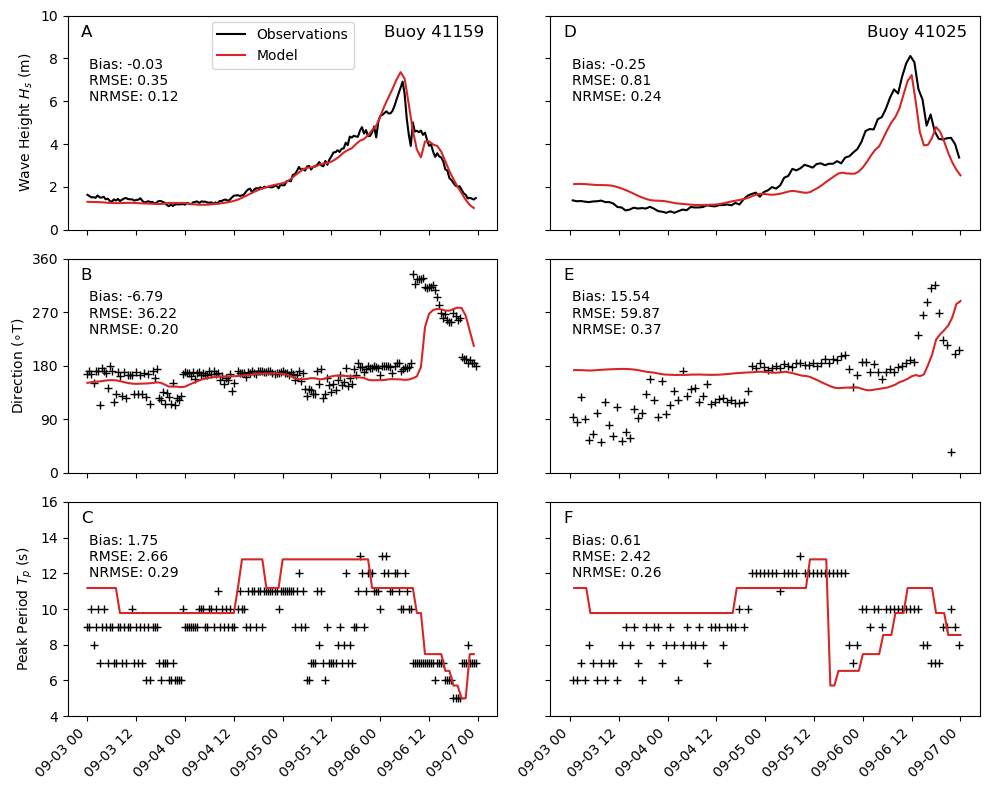

In [15]:
# Create an array with 12-hour increments
x_ticks = np.arange(start_date, end_date+np.timedelta64(12, 'h'), np.timedelta64(12, 'h'))

# Format the tick labels (e.g., 'MM-DD HH:MM' format)
x_labels = [pd.Timestamp(x).strftime('%m-%d %H') for x in x_ticks]

fig, axs = plt.subplots( 3, 2, sharex=True, sharey=False, figsize=( 10, 8 ) )

axs[0,0].plot(wtime1, Hso1, '-k', label='Observations')
axs[0,0].plot(mtimei1, Hsm1, '-', c='tab:red', label='Model')
a, s = scat_stats_string( Hsm1, Hso1i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[0,0].text(.05, .6, txt, fontsize=10, transform=axs[0,0].transAxes )
axs[0,0].text(.03, .9, 'A', fontsize=12, transform=axs[0,0].transAxes )
axs[0,0].text(.97, .9, 'Buoy 41159', fontsize=12, ha='right', transform=axs[0,0].transAxes )

axs[0,0].set_ylim((0,10))
axs[0,0].set_ylabel('Wave Height $H_s$ (m)')
axs[0,0].legend(loc='upper center')

axs[0,1].plot(wtime2, Hso2, '-k')
axs[0,1].plot(mtimei2, Hsm2, '-', c='tab:red' )
a, s = scat_stats_string( Hsm2, Hso2i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[0,1].text(.05, .6, txt, fontsize=10, transform=axs[0,1].transAxes )
axs[0,1].text(.03, .9, 'D', fontsize=12, transform=axs[0,1].transAxes )
axs[0,1].set_ylim((0,10))
axs[0,1].set_yticklabels([])
axs[0,1].text(.97, .9, 'Buoy 41025', fontsize=12, ha='right', transform=axs[0,1].transAxes )


axs[1,0].plot(wtime1, Dmo1, '+k')
axs[1,0].plot(mtimei1, Dmm1, '-', c='tab:red')
a, s = scat_stats_string( Dmm1, Dmo1i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[1,0].text(.05, .65, txt, fontsize=10, transform=axs[1,0].transAxes )
axs[1,0].text(.03, .9, 'B', fontsize=12, transform=axs[1,0].transAxes )

axs[1,0].set_ylim((0,360))
axs[1,0].set_yticks([0, 90, 180, 270, 360])
axs[1,0].set_ylabel('Direction ($\circ$T)')

axs[1,1].plot(wtime2, Dmo2, '+k')
axs[1,1].plot(mtimei2, Dmm2, '-', c='tab:red')
a, s = scat_stats_string( Dmm2, Dmo2i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[1,1].text(.05, .65, txt, fontsize=10, transform=axs[1,1].transAxes )
axs[1,1].text(.03, .9, 'E', fontsize=12, transform=axs[1,1].transAxes )
axs[1,1].set_ylim((0,360))
axs[1,1].set_yticks([0, 90, 180, 270, 360])
axs[1,1].set_yticklabels([])

axs[2,0].plot(wtime1, Tpo1, '+k')
axs[2,0].plot(mtimei1, Tpm1, '-', c='tab:red')
a, s = scat_stats_string( Tpm1, Tpo1i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[2,0].text(.05, .65, txt, fontsize=10, transform=axs[2,0].transAxes )
axs[2,0].text(.03, .9, 'C', fontsize=12, transform=axs[2,0].transAxes )

axs[2,0].set_ylim((4,16))
axs[2,0].set_xticks( x_ticks )
axs[2,0].set_xticklabels(x_labels, rotation=45, ha="right")
axs[2,0].set_ylabel('Peak Period $T_p$ (s)')

axs[2,1].plot(wtime2, Tpo2, '+k')
axs[2,1].plot(mtimei2, Tpm2, '-', c='tab:red')
a, s = scat_stats_string( Tpm2, Tpo2i, sep_lines=True )
txt = 'Bias: {0:.2f}\nRMSE: {1:.2f}\nNRMSE: {2:.2f}' \
    .format( a[4],a[2],a[5])
axs[2,1].text(.05, .65, txt, fontsize=10, transform=axs[2,1].transAxes )
axs[2,1].text(.03, .9, 'F', fontsize=12, transform=axs[2,1].transAxes )
axs[2,1].set_ylim((4,16))
axs[2,1].set_yticklabels([])
axs[2,1].set_xticks( x_ticks )
axs[2,1].set_xticklabels(x_labels, rotation=45, ha="right")
plt.tight_layout()
plt.savefig('dorian_wave_stats_comparison.png', bbox_inches='tight', dpi=200)